In [5]:
import pandas as pd

# Path to your file
file_path = "data/Land_and_Ocean_global_average_monthly.txt"

# Step 1: Read the file, skipping comment lines starting with '%'
with open(file_path, "r") as f:
    lines = [line for line in f if not line.strip().startswith('%') and line.strip()]

# Step 2: Find where the actual data table begins
# We'll detect the first line that starts with a year (e.g., "1850")
data_lines = [line for line in lines if line.strip() and line.strip().split()[0].isdigit()]

# Step 3: Define column names manually (from the header in your snippet)
columns = [
    "Year", "Month", 
    "Monthly_Anomaly", "Monthly_Uncertainty", 
    "Annual_Anomaly", "Annual_Uncertainty", 
    "FiveYear_Anomaly", "FiveYear_Uncertainty", 
    "TenYear_Anomaly", "TenYear_Uncertainty", 
    "TwentyYear_Anomaly", "TwentyYear_Uncertainty"
]

# Step 4: Read the numeric data using pandas.read_csv with delim_whitespace=True
from io import StringIO

data_str = "".join(data_lines)
df = pd.read_csv(StringIO(data_str), delim_whitespace=True, names=columns)

# Step 5: Save to CSV
df.to_csv("data/GlobalTemperatures.csv", index=False)

print("✅ Done! Saved as GlobalTemperatures.csv")
print(df.head())

✅ Done! Saved as GlobalTemperatures.csv
   Year  Month  Monthly_Anomaly  Monthly_Uncertainty  Annual_Anomaly  \
0  1850      1           -0.782                0.470             NaN   
1  1850      2           -0.268                0.396             NaN   
2  1850      3           -0.413                0.345             NaN   
3  1850      4           -0.701                0.396             NaN   
4  1850      5           -0.694                0.305             NaN   

   Annual_Uncertainty  FiveYear_Anomaly  FiveYear_Uncertainty  \
0                 NaN               NaN                   NaN   
1                 NaN               NaN                   NaN   
2                 NaN               NaN                   NaN   
3                 NaN               NaN                   NaN   
4                 NaN               NaN                   NaN   

   TenYear_Anomaly  TenYear_Uncertainty  TwentyYear_Anomaly  \
0              NaN                  NaN                 NaN   
1         

/var/folders/bf/dp4rbnqn0034dj8mbjyqbgm00000gn/T/ipykernel_88869/956597389.py:28: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(StringIO(data_str), delim_whitespace=True, names=columns)


In [13]:
df[['Year','Month','Monthly_Anomaly']].to_json("data/temp_data.json", orient="records")

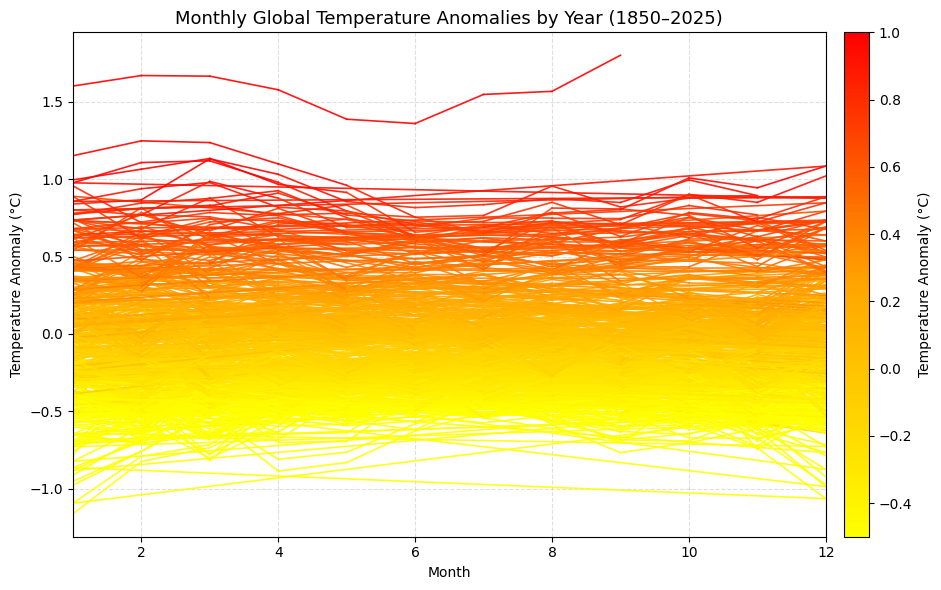

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Load your data
df = pd.read_csv("data/GlobalTemperatures.csv")

# Ensure numeric columns
df['Month'] = df['Month'].astype(int)
df['Monthly_Anomaly'] = pd.to_numeric(df['Monthly_Anomaly'], errors='coerce')

# Create colormap: yellow → orange → red
colors = ["yellow", "orange", "red"]
cmap = mcolors.LinearSegmentedColormap.from_list("anomaly_cmap", colors)

# Normalize color scale
norm = mcolors.Normalize(vmin=-0.5, vmax=1.0)

# --- Create figure and axes explicitly ---
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each year's line
for year, group in df.groupby('Year'):
    for i in range(len(group) - 1):
        x = group['Month'].iloc[i:i+2]
        y = group['Monthly_Anomaly'].iloc[i:i+2]
        color = cmap(norm(y.mean()))
        ax.plot(x, y, color=color, linewidth=1.2, alpha=0.9)

# Style
ax.set_title("Monthly Global Temperature Anomalies by Year (1850–2025)", fontsize=13)
ax.set_xlabel("Month")
ax.set_ylabel("Temperature Anomaly (°C)")
ax.grid(True, linestyle='--', alpha=0.4)
ax.set_xlim(1, 12)

# --- Create a mappable for colorbar ---
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

# --- Add colorbar attached to the current Axes ---
cbar = fig.colorbar(sm, ax=ax, pad=0.02)
cbar.set_label("Temperature Anomaly (°C)")

plt.tight_layout()
plt.show()

